<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-3 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> MNIST Fashion Dataset Application with Keras </h2> </html>


This is a sample image classification tutorial with the MNIST fashion image dataset.

In [13]:
#from __future__ import absolute_import,division, print_function,unicode_literal
# Your code to import TensorFlow
import tensorflow as tf

# Your code to import Keras
from tensorflow import keras

# Your code to import Numpy
import numpy as np

# ...
# ...
# ...



<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


### Import the Fashion MNIST dataset
This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen below.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:




_______________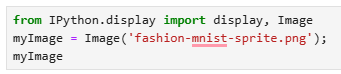

In [18]:
from IPython.display import display, Image
myImage = Image('fashion-mnist-sprite.png');
myImage

FileNotFoundError: No such file or directory: 'fashion-mnist-sprite.png'

FileNotFoundError: No such file or directory: 'fashion-mnist-sprite.png'

<IPython.core.display.Image object>

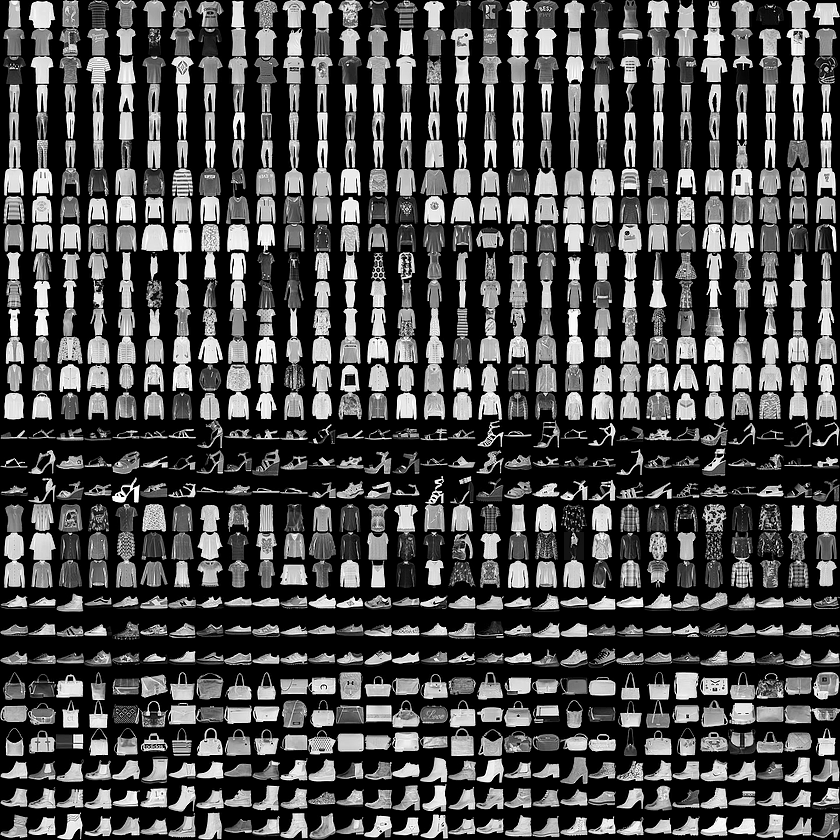

_______________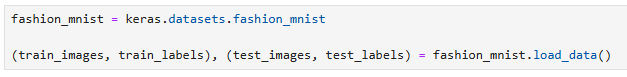

In [22]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>



<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [26]:
# Each image is mapped to a single label. Since the *class names* are not included with the dataset, 
# store them here to use later when plotting the images:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [38]:
# Your code to print the shape of the training images

# ...

# Each image is mapped to a single label. Since the *class names* are not included with the dataset, 
# store them here to use later when plotting the images:

train_images.shape

(60000, 28, 28)

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [40]:
# Your code to print the length of train labels

# ...
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print the length of the training labels
print("Length of the training labels:", len(y_train))



Length of the training labels: 60000


60000

Each label is an integer between 0 and 9:

In [28]:
# Your code to print the training labels

# ....
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print the training labels
print("Training labels:", y_train)


Training labels: [9 0 0 ... 3 0 5]


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [30]:
# Your code to print the shape of the test set images

# ...
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print the shape of the test set images
print("Shape of the test set images:", x_test.shape)


Shape of the test set images: (10000, 28, 28)


(10000, 28, 28)

And the test set contains 10,000 images labels:

In [32]:
# Your code to print the length of the test labels

# ...
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print the length of the test labels
print("Length of the test labels:", len(y_test))


Length of the test labels: 10000


10000

### Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

__________________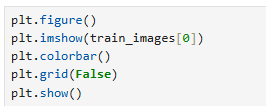

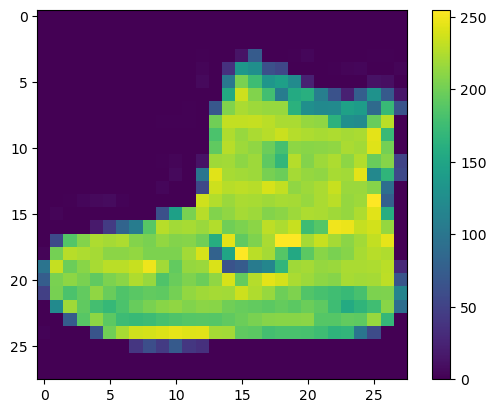

In [44]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


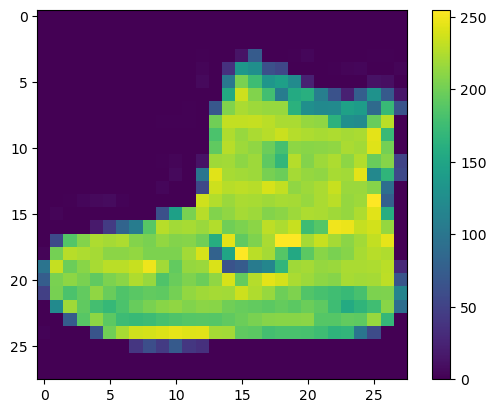

_________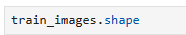

In [46]:
train_images.shape

(60000, 28, 28)

(60000, 28, 28)

________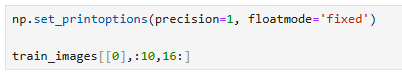

In [48]:
np.set_printoptions(precision=1, floatmode='fixed')
train_images[[0],:10,16:]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [207, 178, 107, 156, 161, 109,  64,  23,  77, 130,  72,  15],
        [218, 216, 216, 163, 127, 121, 122, 146, 141,  88, 172,  66],
        [233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229,   0],
        [223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173,   0]]],
      dtype=uint8)

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [ 73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [207, 178, 107, 156, 161, 109,  64,  23,  77, 130,  72,  15],
        [218, 216, 216, 163, 127, 121, 122, 146, 141,  88, 172,  66],
        [233, 229, 223, 223, 215, 213, 164, 127, 123, 196, 229,   0],
        [223, 228, 235, 227, 224, 222, 224, 221, 223, 245, 173,   0]]],
      dtype=uint8)

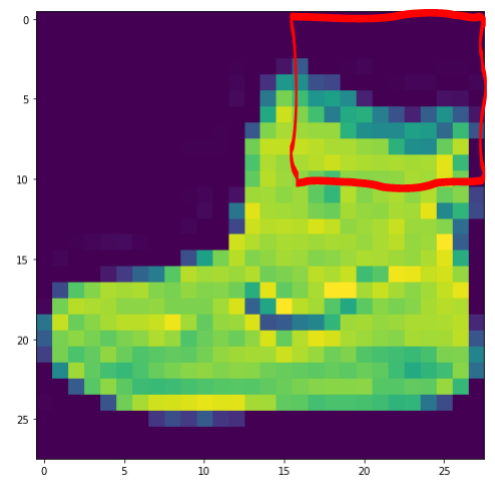

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

_____________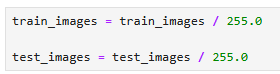

In [50]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

_______________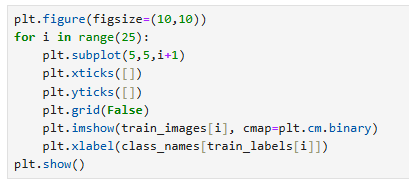

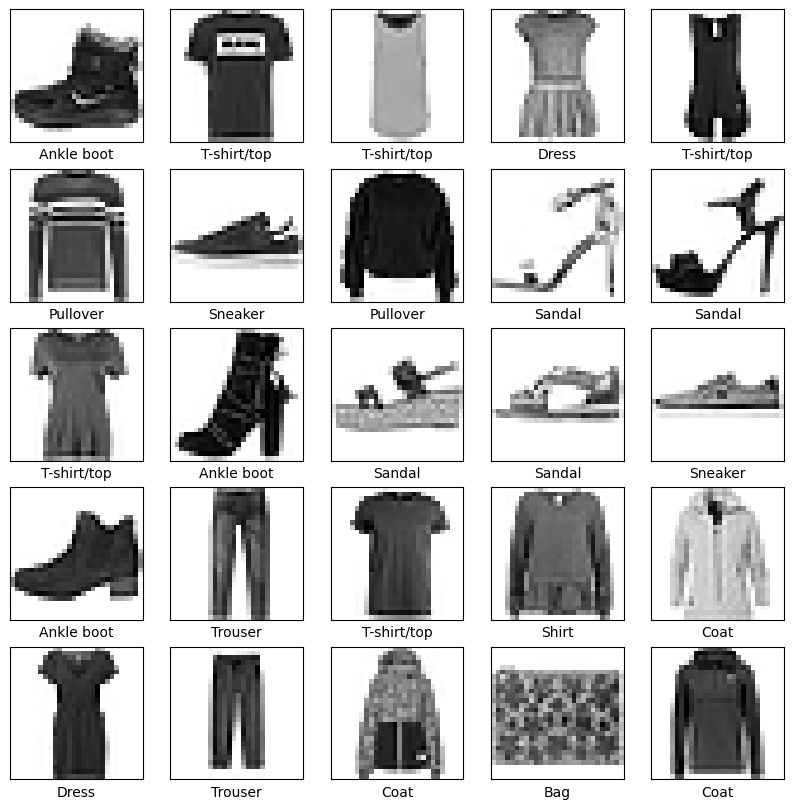

In [66]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot (5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow (train_images[i], cmap=plt. cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

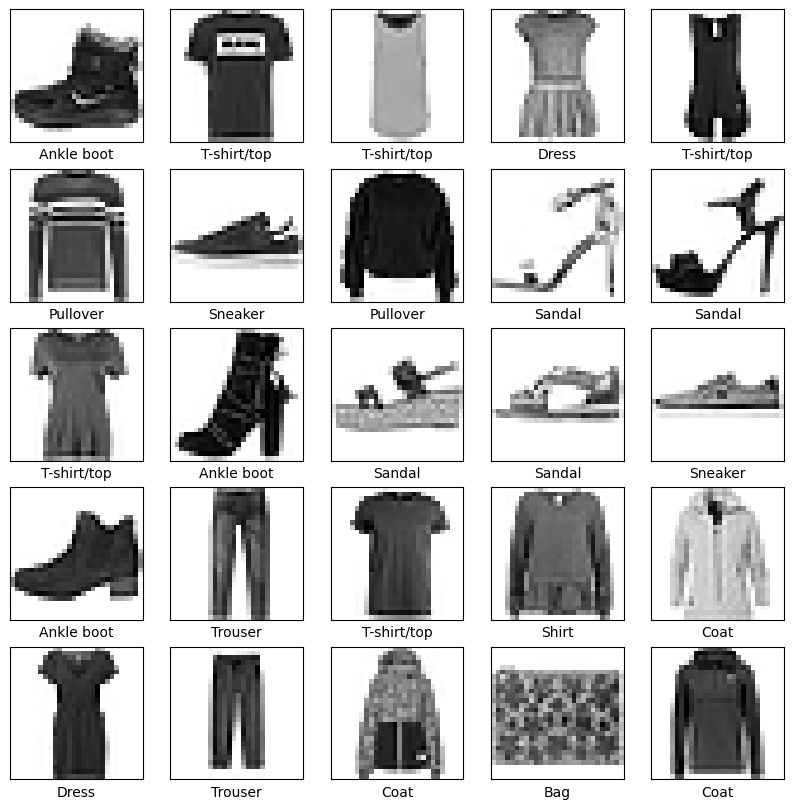

<html> <h2 style="font-style:bold; color:blue;"> Build the model </h2> </html>


Building the neural network requires configuring the layers of the model, then compiling the model.

Develop a a neural network model of your choice i.e. number of layers and activation function. Remember the input is a 2-D so you need to flatten the input.

The first layer in this network, keras.layers.Flatten, should transform the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

In [88]:

# Your code to build the neural network model.
model = keras.Sequential([

# Use model.add.Flatten() layer as the first layer.
    keras.layers.Flatten(input_shape=(28, 28)),
# Choose softmax in the output layer. Choose the number of layers and activation functions in the hidden layers of your choice.
    keras.layers.Dense(10, activation='softmax'),
# Do not forget to set a correct number of neurons in the output layer.
    keras.layers.Dense(10, activation= 'softmax')
])
# ...
# ...
# ...
# ...



_____________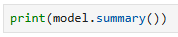

In [90]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

None


In [103]:
# The result will be different, as your particular unique model should be demonstrated here


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


<html> <h3 style="font-style:italic; color:blue;"> Compile the model </h3> </html>

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.


We have used 'adam' optimizer. Try other optimizer functions. Use Keras API as a reference  

_____________________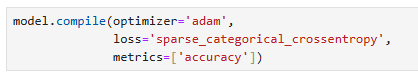

In [92]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<html> <h3 style="font-style:italic; color:blue;"> Train the model </h3> </html>

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.



#### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

If you use your laptop without GPU, reduce epochs, number:  epochs=20

_______________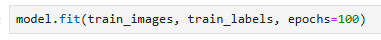

In [94]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 263us/step - accuracy: 0.5009 - loss: 1.7486
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.6510 - loss: 0.9535
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.6737 - loss: 0.7974
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.7172 - loss: 0.7261
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step - accuracy: 0.7278 - loss: 0.6760
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 278us/step - accuracy: 0.7349 - loss: 0.6503
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.7410 - loss: 0.6402
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.7476 - loss: 0.6281
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.7561 - loss: 0.6165
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.7724 - loss: 0.5968
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.7771 - loss: 0.58

In [107]:
history = model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7817 - loss: 0.6248
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8605 - loss: 0.3873
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8735 - loss: 0.3429
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8848 - loss: 0.3142
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8938 - loss: 0.2931
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8975 - loss: 0.2837
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9006 - loss: 0.2662
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9058 - loss: 0.2563
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9072 - loss: 0.2480
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9107 - loss: 0.2393
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9149 - loss: 0.2278
Epoch 1

As the model trains, the loss and accuracy metrics are displayed.

________________________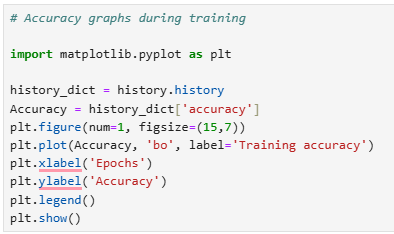

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.7565 - loss: 0.6879 - val_accuracy: 0.8497 - val_loss: 0.4161
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.8608 - loss: 0.3885 - val_accuracy: 0.8628 - val_loss: 0.3775
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.8716 - loss: 0.3455 - val_accuracy: 0.8697 - val_loss: 0.3644
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.8799 - loss: 0.3186 - val_accuracy: 0.8780 - val_loss: 0.3433
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.8886 - loss: 0.2981 - val_accuracy: 0.8788 - val_loss: 0.3372
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.8971 - loss: 0.2776 - val_accuracy: 0.8836 - val_loss: 0.3227
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.8990 - loss: 0.2710 - val_accuracy: 0.8847 - val_loss: 0.3245
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.9035 - loss: 0.25

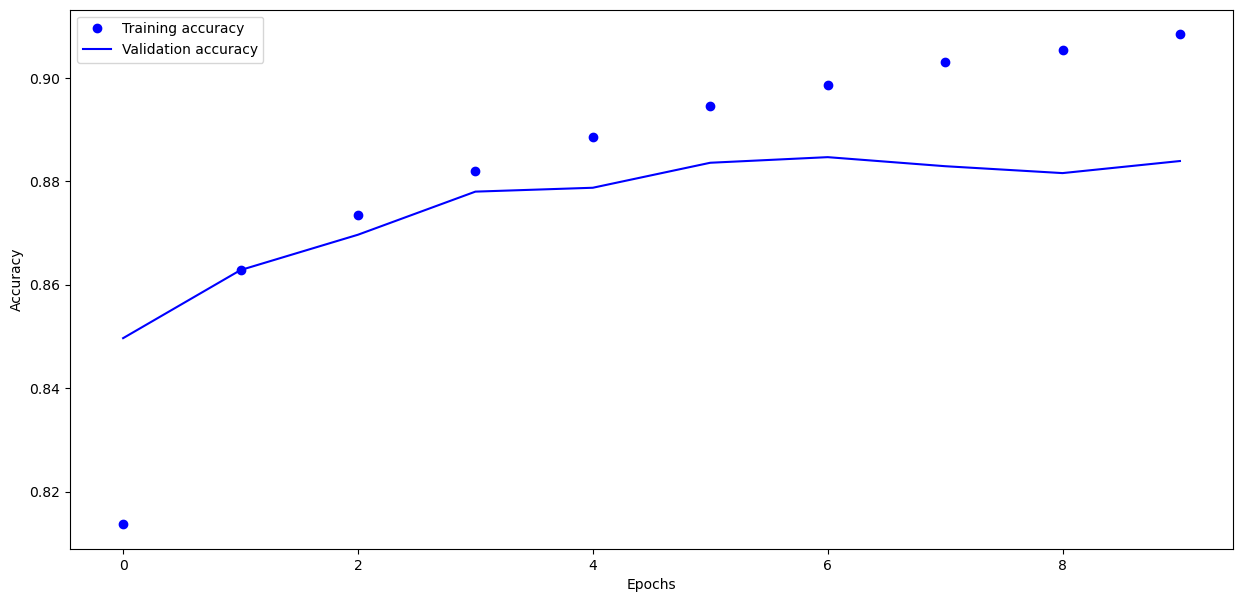

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - accuracy: 0.8787 - loss: 0.3546
Test Accuracy: 0.8796


In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# Convert labels to one-hot encoding (if needed)
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training and validation accuracy
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

plt.figure(figsize=(15, 7))
plt.plot(accuracy, 'bo', label='Training accuracy')
plt.plot(val_accuracy, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

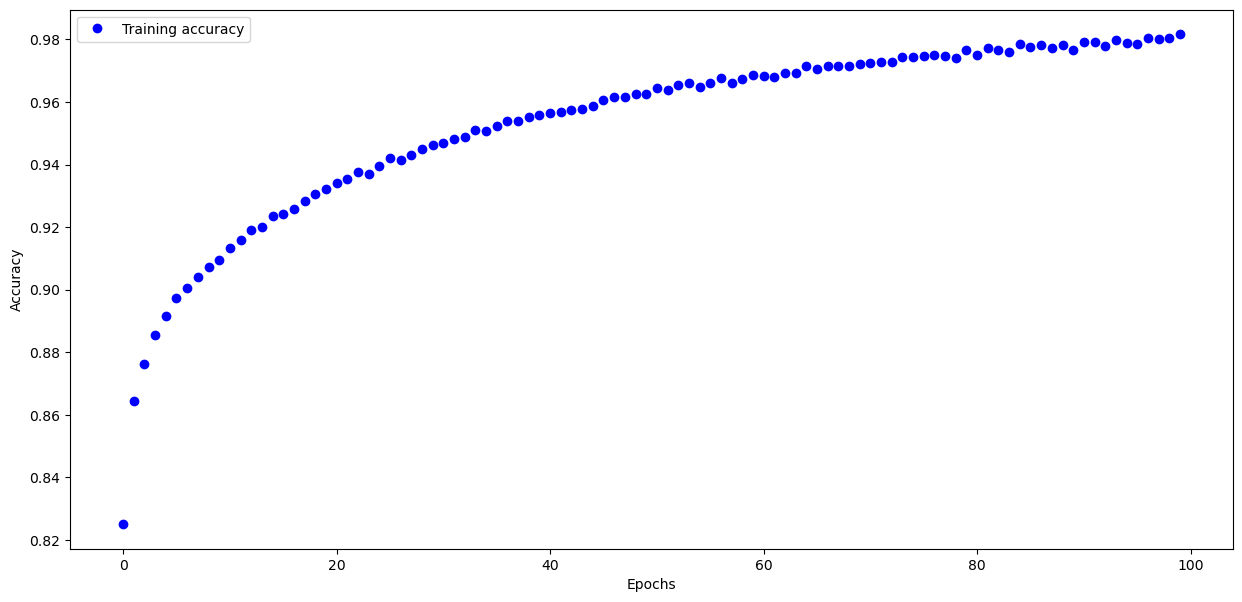

#### Evaluate accuracy

Next, compare how the model performs on the test dataset:

_________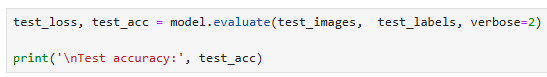

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.7658 - loss: 0.6729 - val_accuracy: 0.8585 - val_loss: 0.4011
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.8591 - loss: 0.3927 - val_accuracy: 0.8593 - val_loss: 0.3931
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.8735 - loss: 0.3454 - val_accuracy: 0.8691 - val_loss: 0.3617
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.8811 - loss: 0.3220 - val_accuracy: 0.8657 - val_loss: 0.3692
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.8893 - loss: 0.2975 - val_accuracy: 0.8716 - val_loss: 0.3517
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.8932 - loss: 0.2861 - val_accuracy: 0.8751 - val_loss: 0.3492
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.8953 - loss: 0.2762 - val_accuracy: 0.8841 - val_loss: 0.3253
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.9019 -

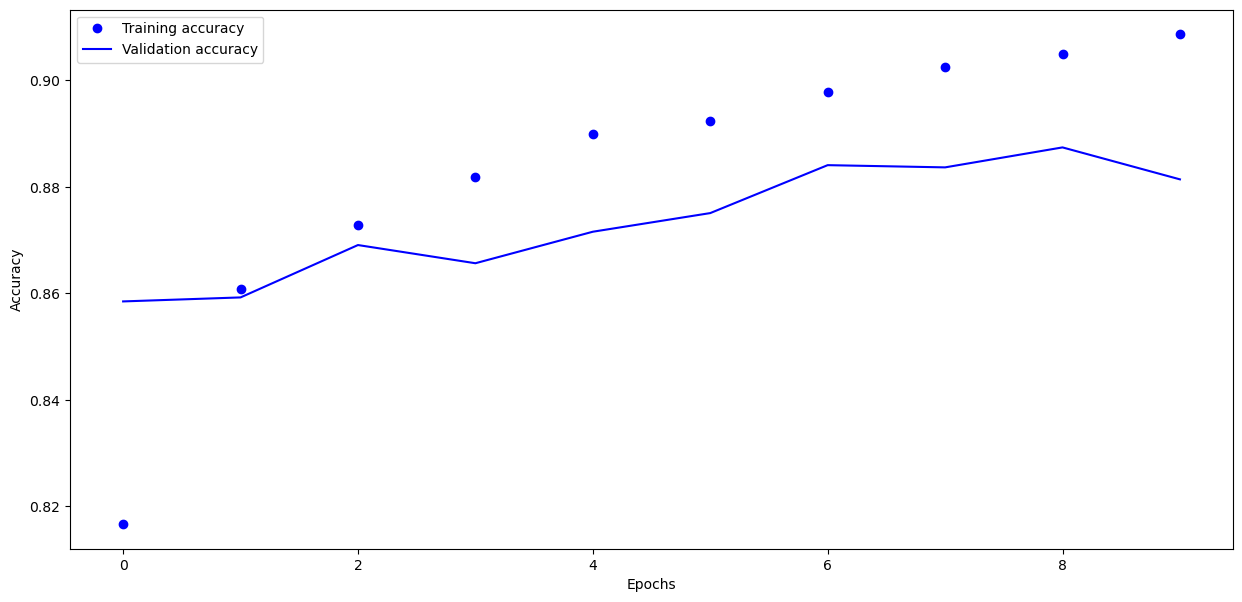

313/313 - 0s - 420us/step - accuracy: 0.8753 - loss: 0.3654
Test Accuracy: 0.8753


In [31]:
# Import necessary libraries
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training and validation accuracy
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

plt.figure(figsize=(15, 7))
plt.plot(accuracy, 'bo', label='Training accuracy')
plt.plot(val_accuracy, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.8852 - loss: 0.7656

Test accuracy: 0.885200023651123


### Make predictions

With the model trained, you can use it to make predictions about some images.

______________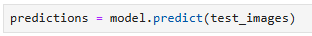

In [35]:
# Make predictions on the test dataset
predictions = model.predict(x_test)

# Display the predictions
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step
[[4.2226939e-06 1.6956859e-06 5.4517642e-07 ... 1.9941632e-02
  1.1367309e-06 9.7995424e-01]
 [5.8586829e-06 1.6400675e-13 9.9679959e-01 ... 2.5186906e-15
  1.8389606e-07 4.8909583e-14]
 [2.3544836e-11 1.0000000e+00 7.0897437e-14 ... 5.9073095e-25
  4.1870594e-16 5.6462127e-20]
 ...
 [8.1249593e-05 1.1690802e-10 6.3921279e-06 ... 4.2853617e-06
  9.9937379e-01 5.3102884e-08]
 [3.8320966e-10 9.9999905e-01 7.6025592e-12 ... 3.3174542e-17
  4.1852136e-11 2.4109813e-16]
 [5.8231071e-05 7.8297617e-08 3.3605851e-05 ... 1.5532876e-04
  9.4809599e-05 8.0415257e-06]]


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

___________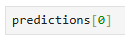

In [37]:
# Make predictions on the test dataset
predictions = model.predict(x_test)

# Display the first prediction
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
[4.2226939e-06 1.6956859e-06 5.4517642e-07 1.2870348e-08 7.4725044e-06
 8.4353989e-05 4.6743908e-06 1.9941632e-02 1.1367309e-06 9.7995424e-01]


array([2.7e-13, 0.0e+00, 1.2e-25, 0.0e+00, 4.6e-33, 2.2e-13, 5.5e-27,
       2.7e-12, 1.3e-22, 1.0e+00], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

_________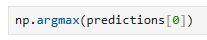

In [39]:
import numpy as np

# Get the index of the highest confidence value in the first prediction
predicted_label = np.argmax(predictions[0])

# Print the predicted label
print(predicted_label)

9


9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

________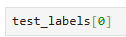

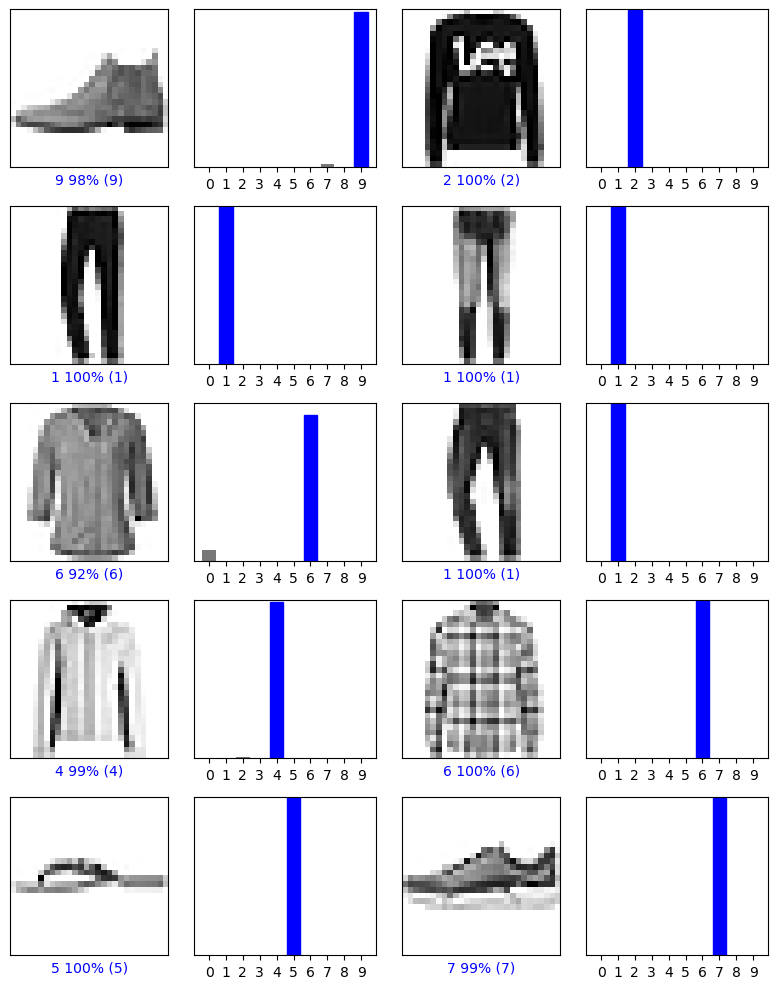

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)
plt.tight_layout()
plt.show()

In [126]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [130]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

____________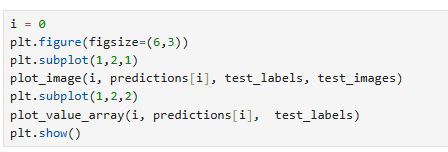

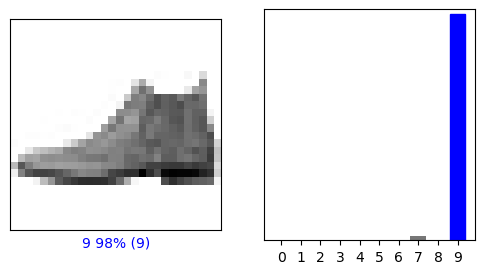

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions to plot the image and prediction array
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the 0th image, predictions, and prediction array
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, y_test, x_test.reshape(-1, 28, 28))  # Use y_test and x_test
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, y_test)  # Use y_test
plt.show()

NameError: name 'test_labels' is not defined

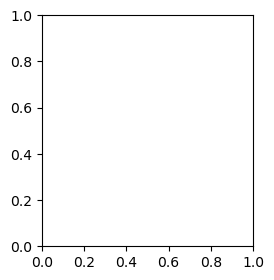

In [49]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Plot any other image

In [135]:
# Your code to plot any other image and confidense score of your choise

# ...
# ...


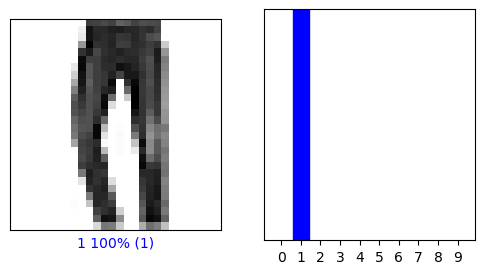

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions to plot the image and prediction array
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Choose an image index (e.g., 5 for the 6th image)
i = 5  # Change this to any index you want to visualize

# Plot the selected image, predictions, and prediction array
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, y_test, x_test.reshape(-1, 28, 28))  # Use y_test and x_test
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, y_test)  # Use y_test
plt.show()

In [142]:
# Plot several images with their predictions.
# In the next cell, you need to plot the first 15 images in the following format.

# Use the sample code of the plots provided in this tutorial. Hint - You need to
# use subplots, for loop, etc..

# Plot the first X test images, their predicted labels, and the true labels.

# Color correct predictions in blue and incorrect predictions in red.

________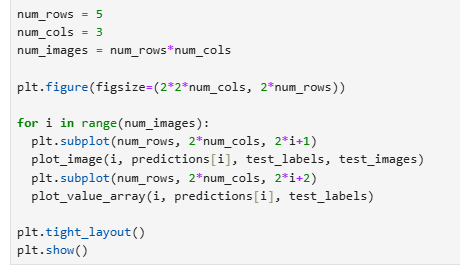

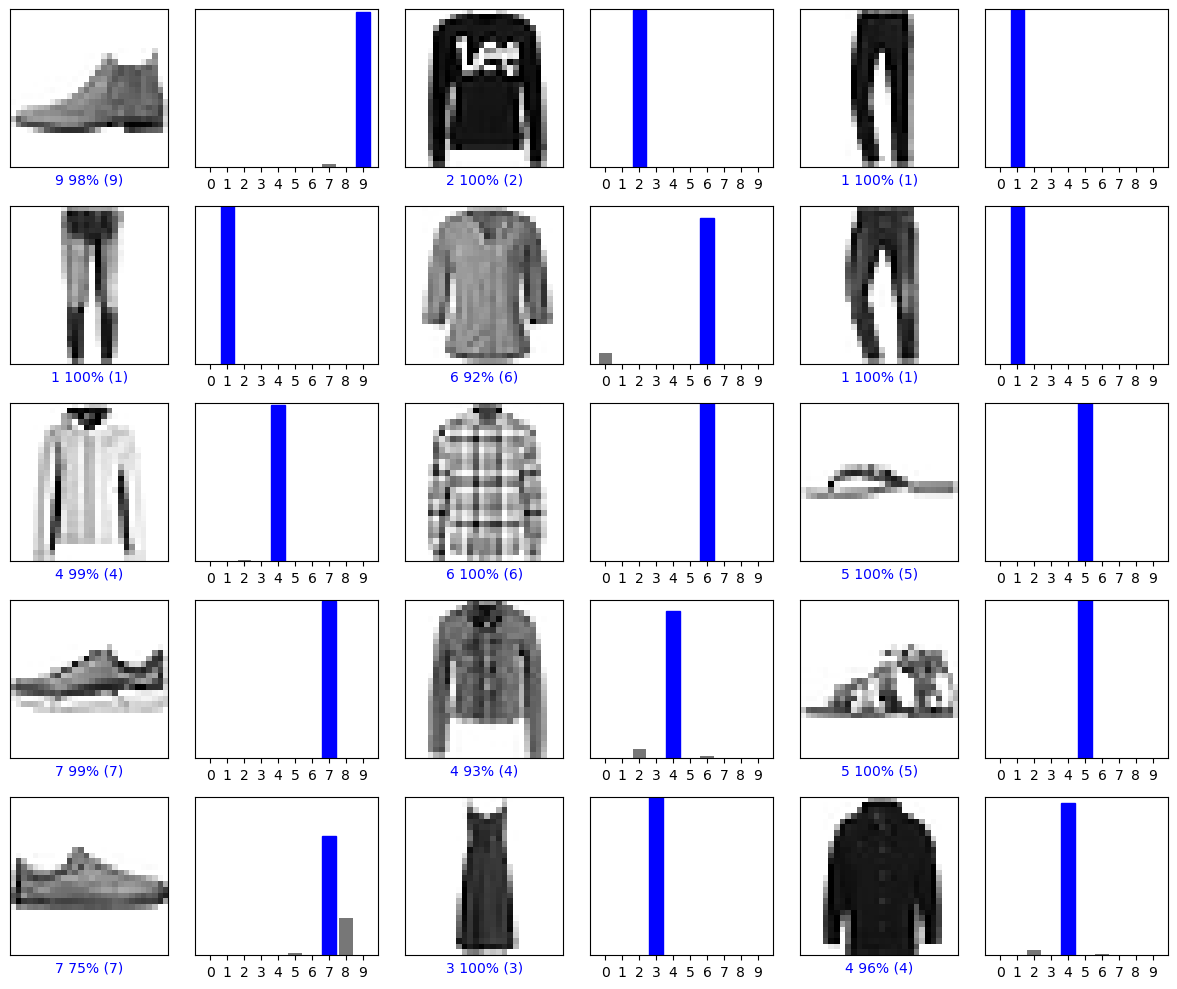

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions to plot the image and prediction array
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the first 15 test images, their predicted labels, and the true labels
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test, x_test.reshape(-1, 28, 28))  # Use y_test and x_test
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test)  # Use y_test

plt.tight_layout()
plt.show()

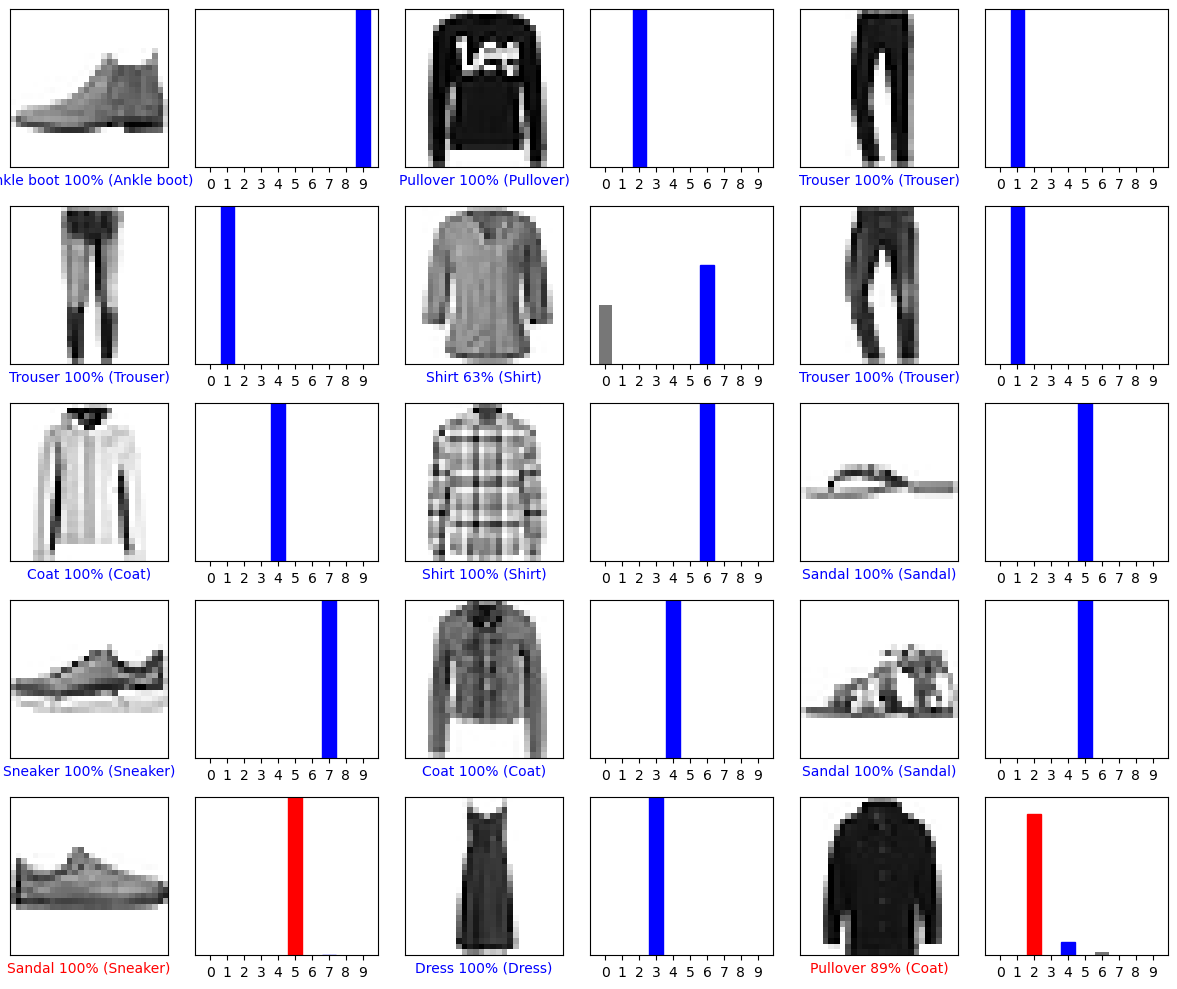

In [148]:
#
# Your code to plot first 20 predictions in the above format.
#
# ...
# ...

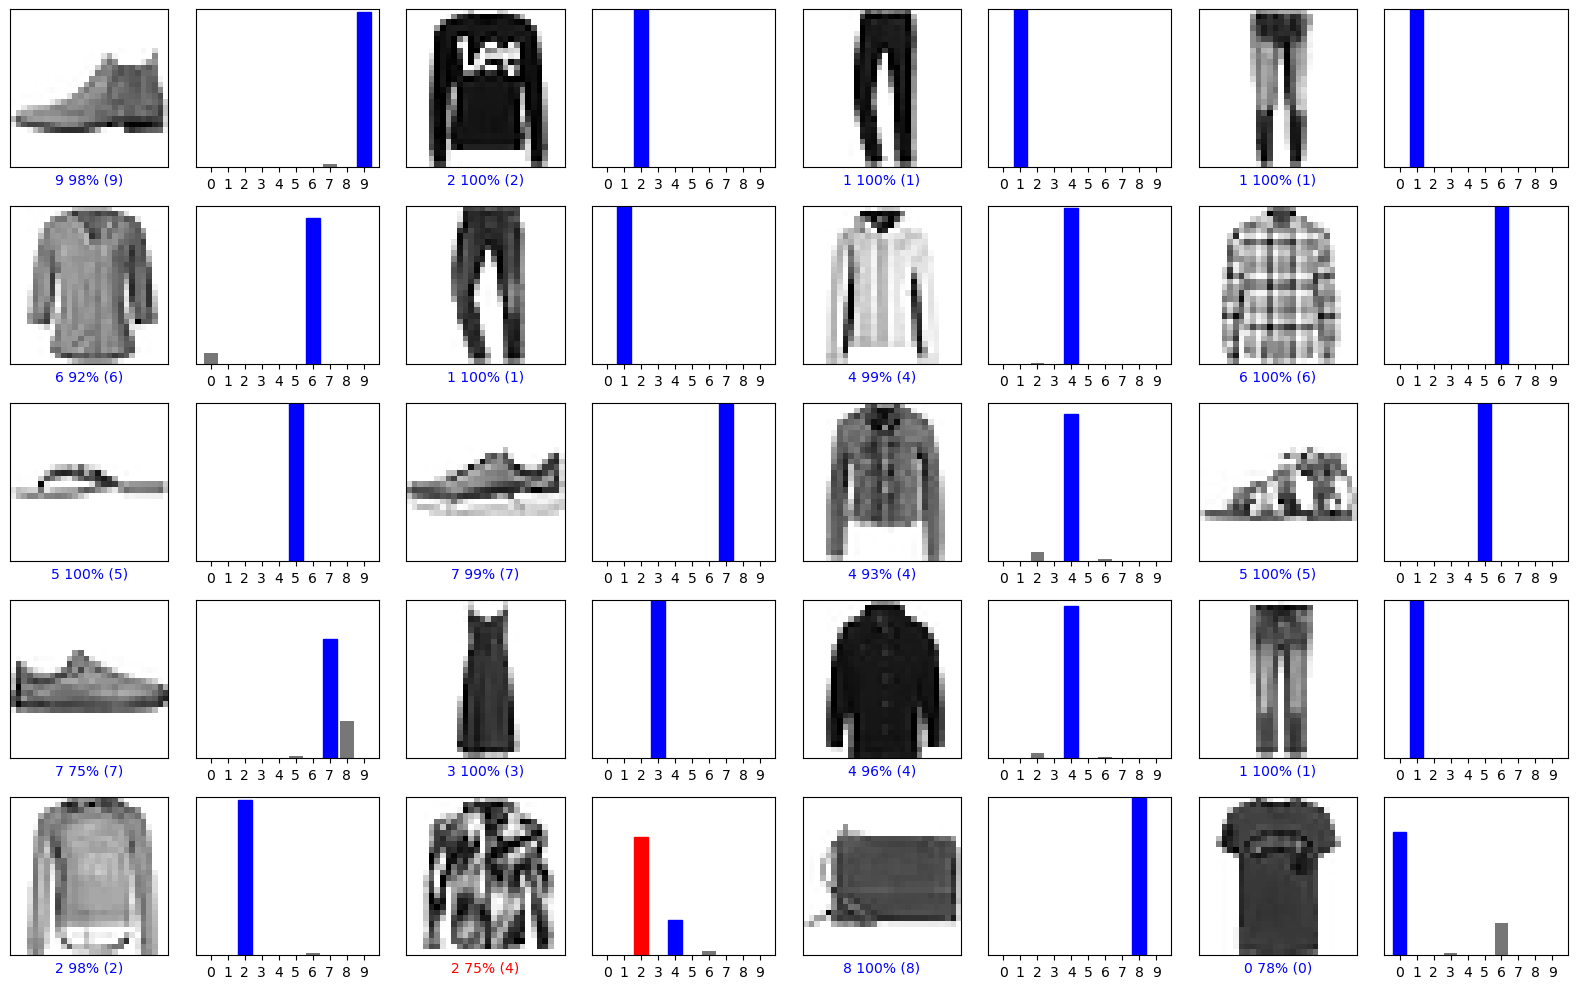

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions to plot the image and prediction array
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the first 20 test images, their predicted labels, and the true labels
num_rows = 5
num_cols = 4  # Adjusted for 20 images (5 rows x 4 columns)
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test, x_test.reshape(-1, 28, 28))  # Use y_test and x_test
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test)  # Use y_test

plt.tight_layout()
plt.show()

<html> <h2 style="font-style:bold; color:blue;"> Use the trained model </h2> </html>
(Advanced part)

Finally, use the trained model to make a prediction about a single image.

____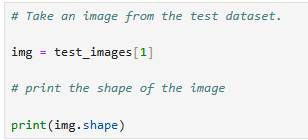

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.7648 - loss: 0.6723 - val_accuracy: 0.8557 - val_loss: 0.3983
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.8610 - loss: 0.3837 - val_accuracy: 0.8717 - val_loss: 0.3561
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.8743 - loss: 0.3409 - val_accuracy: 0.8654 - val_loss: 0.3791
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.8870 - loss: 0.3119 - val_accuracy: 0.8787 - val_loss: 0.3310
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.8897 - loss: 0.2985 - val_accuracy: 0.8698 - val_loss: 0.3777
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.8939 - loss: 0.2849 - val_accuracy: 0.8751 - val_loss: 0.3649
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.9000 - loss: 0.2677 - val_accuracy: 0.8776 - val_loss: 0.3403
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.9052 -

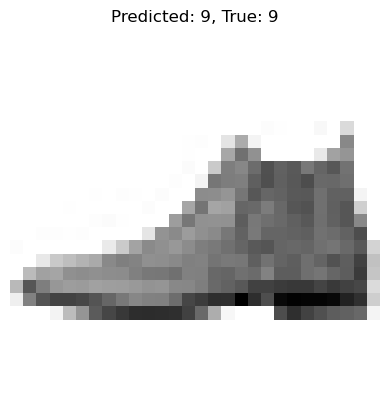

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Take an image from the test dataset
img = x_test[0]  # Use the first image in the test dataset (change index as needed)

# Print the shape of the image
print("Image shape:", img.shape)

# Reshape the image to match the input shape of the model
img = img.reshape(1, 784)  # Reshape to (1, 784) for the model input

# Make a prediction using the trained model
prediction = model.predict(img)

# Print the prediction array (confidence scores for each class)
print("Prediction array:", prediction)

# Get the predicted class label
predicted_label = np.argmax(prediction)
print("Predicted label:", predicted_label)

# Get the true label for the image
true_label = y_test[0]  # Use the corresponding true label
print("True label:", true_label)

# Display the image
plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.axis('off')
plt.show()

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

_________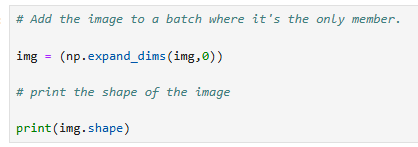

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.7671 - loss: 0.6623 - val_accuracy: 0.8572 - val_loss: 0.4028
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.8597 - loss: 0.3860 - val_accuracy: 0.8598 - val_loss: 0.3845
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.8768 - loss: 0.3391 - val_accuracy: 0.8712 - val_loss: 0.3645
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.8810 - loss: 0.3177 - val_accuracy: 0.8739 - val_loss: 0.3481
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.8903 - loss: 0.2973 - val_accuracy: 0.8807 - val_loss: 0.3353
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.8982 - loss: 0.2753 - val_accuracy: 0.8659 - val_loss: 0.3693
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - accuracy: 0.8962 - loss: 0.2742 - val_accuracy: 0.8855 - val_loss: 0.3199
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.9057 -

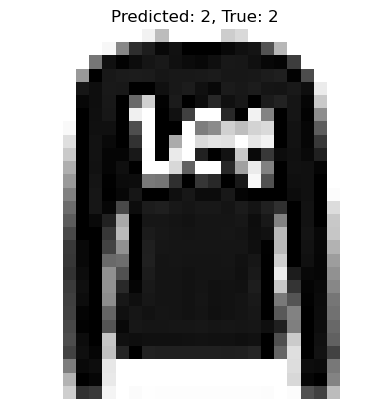

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Take an image from the test dataset
img = x_test[1]  # Use the second image in the test dataset (change index as needed)

# Print the shape of the image
print("Image shape:", img.shape)

# Reshape the image to match the input shape of the model
img = img.reshape(1, 784)  # Reshape to (1, 784) for the model input

# Make a prediction using the trained model
prediction = model.predict(img)

# Print the prediction array (confidence scores for each class)
print("Prediction array:", prediction)

# Get the predicted class label
predicted_label = np.argmax(prediction)
print("Predicted label:", predicted_label)

# Get the true label for the image
true_label = y_test[1]  # Use the corresponding true label
print("True label:", true_label)

# Display the image
plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.axis('off')
plt.show()

(1, 28, 28)


Now predict the correct label for this image:

_________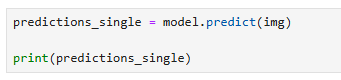

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.7595 - loss: 0.6941 - val_accuracy: 0.8516 - val_loss: 0.4087
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.8582 - loss: 0.3891 - val_accuracy: 0.8664 - val_loss: 0.3682
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.8740 - loss: 0.3433 - val_accuracy: 0.8679 - val_loss: 0.3522
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.8825 - loss: 0.3226 - val_accuracy: 0.8778 - val_loss: 0.3453
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.8906 - loss: 0.2966 - val_accuracy: 0.8823 - val_loss: 0.3371
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.8927 - loss: 0.2873 - val_accuracy: 0.8711 - val_loss: 0.3650
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.9002 - loss: 0.2714 - val_accuracy: 0.8812 - val_loss: 0.3368
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.9033 -

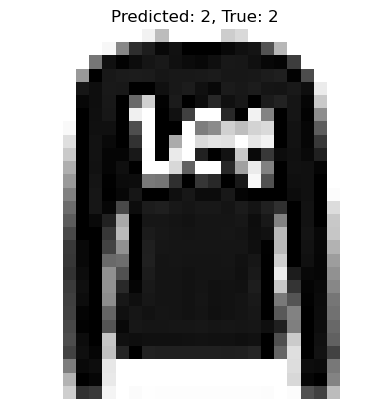

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Take an image from the test dataset
img = x_test[1]  # Use the second image in the test dataset (change index as needed)

# Print the shape of the image
print("Image shape:", img.shape)

# Reshape the image to match the input shape of the model
img = img.reshape(1, 784)  # Reshape to (1, 784) for the model input

# Make a prediction using the trained model
prediction = model.predict(img)

# Print the prediction array (confidence scores for each class)
print("Prediction array:", prediction)

# Get the predicted class label
predicted_label = np.argmax(prediction)
print("Predicted label:", predicted_label)

# Get the true label for the image
true_label = y_test[1]  # Use the corresponding true label
print("True label:", true_label)

# Display the image
plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
[[9.7e-08 0.0e+00 1.0e+00 0.0e+00 8.7e-09 5.2e-16 4.0e-09 0.0e+00 5.7e-24
  0.0e+00]]


___________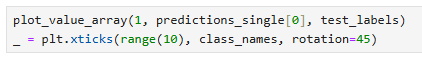

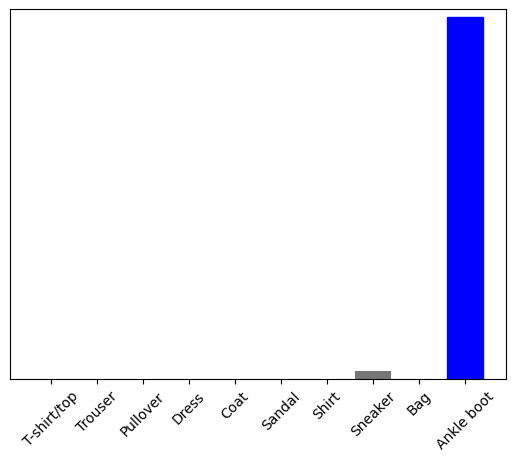

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to plot the value array
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Example class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Example usage
i = 0  # Index of the image you want to plot
plot_value_array(i, predictions, y_test)  # Use y_test for true labels
plt.xticks(range(10), class_names, rotation=45)  # Add class names with rotation
plt.show()

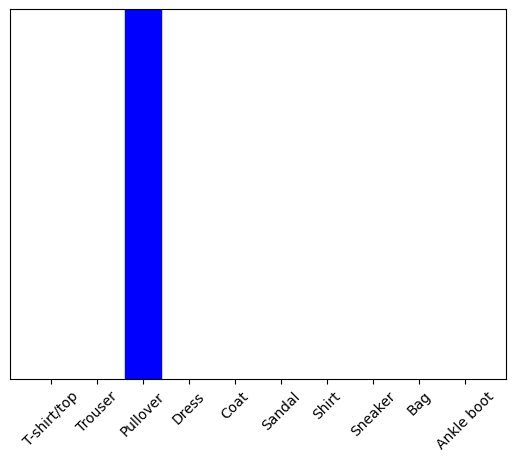

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

_________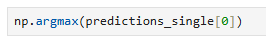

In [67]:
import numpy as np

# Example: predictions_single is the output of model.predict() for a single image
predictions_single = model.predict(img)  # img is a single image reshaped as (1, 784)

# Get the predicted class label
predicted_label = np.argmax(predictions_single[0])

print("Predicted label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted label: 2


2

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### Please record the model's accuracy (test data) and a summary of its development. You can obtain the model summary using the model.summary() method. The API for obtaining the model summary is defined in the following link:

### https://keras.io/api/models/model/#summary-method

### Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.
